##Inisialisasi

In [1]:
#Impor Package dan Libraries yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Impor dataset
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fintech Demo Day/train.csv', sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fintech Demo Day/test.csv', sep=';')

In [3]:
print(df_train.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [ ]:
df_train['age_bin'] = pd.cut(df_train['age'], [0, 20, 30, 40, 50, 60, 100], 
                              labels=['0-20','20-30','30-40','40-50','50-60','60+'])
df_train = df_train.drop('age',axis = 1)

df_test['age_bin'] = pd.cut(df_test['age'], [0, 20, 30, 40, 50, 60, 100], 
                              labels=['0-20','20-30','30-40','40-50','50-60','60+'])
df_test = df_test.drop('age',axis = 1)

In [ ]:
df_train['balance'] = df_train['balance'].agg(lambda x :(x-x.mean())/(x.std()))
df_test['balance'] = df_test['balance'].agg(lambda x :(x-x.mean())/(x.std()))
df_train['duration'] = df_train['duration'].agg(lambda x :(x-x.mean())/(x.std()))
df_test['duration'] = df_test['duration'].agg(lambda x :(x-x.mean())/(x.std()))
df_train['pdays'] = df_train['pdays'].agg(lambda x :(x-x.mean())/(x.std()))
df_test['pdays'] = df_test['pdays'].agg(lambda x :(x-x.mean())/(x.std()))

In [ ]:
df_train = pd.get_dummies(df_train, columns=['job','marital','education','default','housing','loan','contact','month','poutcome','age_bin'], drop_first=False)
df_test = pd.get_dummies(df_test, columns=['job','marital','education','default','housing','loan','contact','month','poutcome','age_bin'], drop_first=False)

In [ ]:
df_train['y'].replace(['yes','no'],[1,0], inplace=True)
df_test['y'].replace(['yes','no'],[1,0], inplace=True)

In [ ]:
df_train_no = df_train[df_train['y'] == 0]
df_train_yes = df_train[df_train['y'] == 1]
df_train = pd.concat([df_train, df_train_yes, df_train_yes])
df_train = df_train.reset_index(drop = True)

In [ ]:
X = df_train.drop('y',axis = 1)
y = df_train['y']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=2022)

In [ ]:
x_test = df_test.drop('y',axis = 1)
y_test = df_test['y']

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(42, activation='relu', input_shape=(x_train.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.Dense(17, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.summary()

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 42)                2394      
                                                                 
 batch_normalization (BatchN  (None, 42)               168       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 17)                731       
                                                                 
 batch_normalization_1 (Batc  (None, 17)               68        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 1)                 18        
                                                                 
Total params: 3,379
Trainable params: 3,261
Non-trainabl

In [ ]:
history = model.fit(
  x_train, y_train,
  validation_data=(x_val, y_val),
  epochs=200)

Epoch 1/200
1570/1570 [==============================] - 10s 4ms/step - loss: 0.3686 - accuracy: 0.8320 - val_loss: 0.3249 - val_accuracy: 0.8580
Epoch 2/200
1570/1570 [==============================] - 6s 4ms/step - loss: 0.3262 - accuracy: 0.8513 - val_loss: 0.3175 - val_accuracy: 0.8521
Epoch 3/200
1570/1570 [==============================] - 6s 4ms/step - loss: 0.3181 - accuracy: 0.8554 - val_loss: 0.3107 - val_accuracy: 0.8625
Epoch 4/200
1570/1570 [==============================] - 6s 4ms/step - loss: 0.3122 - accuracy: 0.8596 - val_loss: 0.3054 - val_accuracy: 0.8670
Epoch 5/200
1570/1570 [==============================] - 6s 4ms/step - loss: 0.3056 - accuracy: 0.8622 - val_loss: 0.2995 - val_accuracy: 0.8729
Epoch 6/200
1570/1570 [==============================] - 6s 4ms/step - loss: 0.3019 - accuracy: 0.8654 - val_loss: 0.3031 - val_accuracy: 0.8674
Epoch 7/200
1570/1570 [==============================] - 6s 4ms/step - loss: 0.3003 - accuracy: 0.8657 - val_loss: 0.3005 - val_a

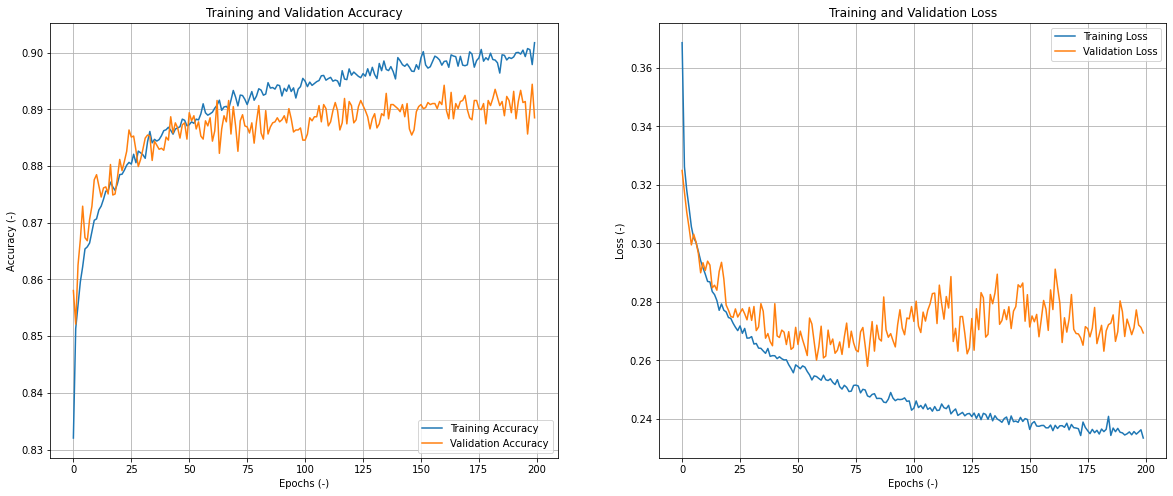

In [ ]:
# Plot Accuracy dan Loss History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.grid(True)
plt.xlabel("Epochs (-)")
plt.ylabel("Accuracy (-)")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.xlabel("Epochs (-)")
plt.ylabel("Loss (-)")
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Menentukan confusion matrix
y_predict=(model.predict(x_val) > 0.5).astype("int32")
confusion_matrix(y_val, y_predict, labels=[0, 1])

array([[3647,  306],
       [ 316, 1310]])

In [ ]:
print(classification_report(y_val, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3953
           1       0.81      0.81      0.81      1626

    accuracy                           0.89      5579
   macro avg       0.87      0.86      0.86      5579
weighted avg       0.89      0.89      0.89      5579



##Prediksi Data Test

In [ ]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test, predictions, labels=[0, 1])

array([[3754,  246],
       [  93,  428]])

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4000
           1       0.64      0.82      0.72       521

    accuracy                           0.93      4521
   macro avg       0.81      0.88      0.84      4521
weighted avg       0.94      0.93      0.93      4521

